In [2]:
# Paquete Numpy
import numpy as np

# Generación de números pseudoaleatorios
from numpy import random as rd

# Módulo para las gráficas
from matplotlib import pyplot as plt

<h1 style="background-color:Green;font-size:36pt;color:white">MODELOS DE SIMULACIÓN </h1>

## Universidad Tecnológica La Salle - León, Nicaragua
### Giusseppe Benito Bervis Quintero

Tomado de:
https://stats.stackexchange.com/questions/525063/trying-to-calculate-confidence-intervals-for-a-monte-carlo-estimate-of-pi-what

https://joanby.github.io/bookdown-estadistica-inferencial/intervalos-de-confianza.html

https://rubenfcasal.github.io/simbook/convergencia.html#detecci%C3%B3n-de-problemas-de-convergencia

# Convergencia del método MonteCarlo

Supongamos que estamos interesados en aproximar la media teórica $\mu = E(X)$ a partir de una secuencia independiente e identicamente distribuida $ X_1, X_2, \ldots, X_n$ mediante la media muestral $\overline{X}_n$. Una justificación teórica de la validez de la aproximación obtenida mediante simulación es la ley de los grandes números:
- **Ley débil:** Si $X_1, X_2, \ldots$ es una secuencia de variables aleatorias independientes con
$$E(X_i)=\mu \mbox{ y } Var(X_i)=\sigma^2 < \infty$$  
entonces $\overline{X}_n = \displaystyle\frac{X_1 + X_2 + \cdots + X_n}{n}$ converge en probabilidad a $\mu$ para cualquier $\varepsilon >0$, i.e:
$$\lim_{n \to \infty}{P \left(|\overline{X}_n - \mu| < \varepsilon \right) = 1}$$

- **Ley fuerte:** Si $X_1, X_2, \ldots$ es una secuencia de variables aleatorias independientes e idénticamente distribuidas que cumpleo $E(X_i) < \infty$ y tienen el valor esperado $E(X_i) = \mu$ entonces
$$P \left(\lim_{n \to \infty} \overline{X}_n = \mu \right) = 1$$
es decir, el promedio de las variables aleatorias converge a $\mu$ casi seguramente.

**Ejercicio:** Simule el lanzamiento de una moneda 10000 veces. Considere la variable aleatoria:

$ X = 
\begin{cases}
0, \mbox{ si al lanzar la moneda sale cruz}\\
1, \mbox{ si al lanzar la moneda sale cara}\\
\end{cases}
$

- Cálcule la media del total de simulaciones. ¿Qué significa este parámetro en este contexto?
- Cálcule la media en cada simulación (tomando en cuenta todas las simulaciones que se han realizado), y realice una gráfica de dichos cálculos. ¿Converge la gráfica, hacia dónde?

La media de todas las simulaciones es 0.4937


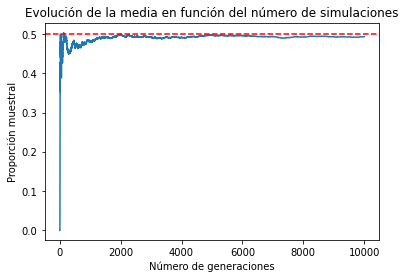

In [16]:
# Generando las simulaciones de la moneda
moneda = rd.binomial(1, 0.5, 10000)

# Calculando la media del total de simulaciones
# Esta es la aproximación de la simulación
print("La media de todas las simulaciones es", np.mean(moneda))

# Calculando la media en cada simulación
mediaT = np.cumsum(moneda)/range(1, len(moneda)+1)

# Graficando
plt.plot(mediaT) # Gráfica de las medias
plt.axhline(y = 0.5, color = 'r', linestyle = '--') # Gráfica del valor teórico

# Etiquetas de la gráfica
plt.title('Evolución de la media en función del número de simulaciones')
plt.xlabel('Número de generaciones')
plt.ylabel('Proporción muestral')
plt.show()

**Ejercicio:** Retome el ejemplo de la inversión de la impresora de B $\&$ B. 
- Realice dos gráficas, para ver la evolución de la utilidad esperada y de la probabilidad de pérdidas. 

La probilidad de perder es 0.0802
La utilidad esperada es 716851.0263620024


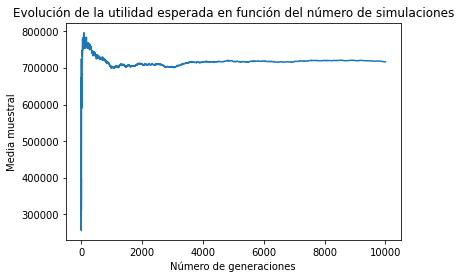

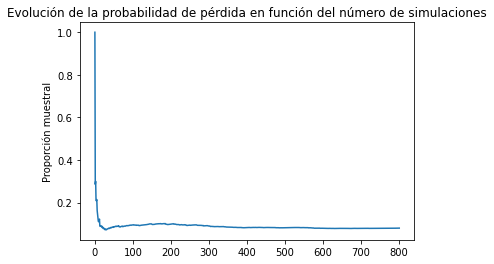

519031.2552140825

In [8]:
CMdO = [43, 44, 45, 46, 47] # Costo de mano de obra
pCMdO = [0.1, 0.2, 0.4, 0.2, 0.1] # Probabilidad del costo de mano de obra

n = 10000 # No. de simulaciones
perdidas = 0 # Contador de perdidas
UtT = 0 # Contador para caluclar la suma de las utilidades

# Creando las listas para guardar los datos
# de la utilidad esperada y de la probabilidad de pérdida
UE_list = []
PP_list = []
N = [] # Lista para ver la evolución de la proporción

for i in range(n):
    c1 = rd.choice(CMdO, p = pCMdO)
    c2 = round(rd.uniform(80, 100), 2)
    x = np.absolute(round(rd.normal(15000, 4500), 0))

    Ut = (249 - c1 - c2)*x - 1000000
    UtT += Ut # Actualización de la utilidad total
    
    # Actualizamos la lista de la UE
    UE_list.append(Ut)

    if Ut <= 0:
        perdidas += 1
        
        # Actualizamos la lista de probabilidad de pérdidas
        PP_list.append(1)
        
        # Actualizamos la lista de índices
        N.append(i)
        

pPerdidas = perdidas / n # Probabilidad de perder
print(f'La probilidad de perder es {pPerdidas}')

UE = UtT / n
print(f'La utilidad esperada es {UE}')

# Generando los valores para las gráficas
# Calculando la media en cada simulación
mediaUE = np.cumsum(UE_list)/range(1, len(UE_list)+1)
# Graficando la evolución de la media
plt.plot(mediaUE)

# Etiquetas de la gráfica
plt.title('Evolución de la utilidad esperada en función del número de simulaciones')
plt.xlabel('Número de generaciones')
plt.ylabel('Media muestral')
plt.show()

# Calculando la proporción en cada simulación
mediaPP = np.cumsum(PP_list)/N

# Graficando la evolución de la proporción
plt.plot(mediaPP)

# Etiquetas de la gráfica
plt.title('Evolución de la probabilidad de pérdida en función del número de simulaciones')
plt.ylabel('Proporción muestral')
plt.show()

# Cálculando las desviación estándar de la media
np.std(UE_list)

In [29]:
import scipy.stats as sts

print(716851.02 - sts.t.ppf(0.975,9999) * 519031.25 / np.sqrt(10000))

# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.t.html

def t(alpha, gl):
    return sts.t.ppf(1-(alpha/2), gl)

t(0.05, 9999), sts.t.ppf(0.975,9999)

706676.9628789102


(1.9602012636213575, 1.9602012636213575)

 Como puede verse, en ambos casos se observa una convergencia hacia el valor estimado para cada estadístico.

**Ejercicio:** Retome el ejemplo de TIBASA, y grafique la evolución del estadístico, en función del número de simulaciones, buscado en dicha simulación. ¿Se puede decir que la evolución converge a algún valor?

# Detección de problemas de convergencia.

Una suposición crucial es que las variables $X_i$ deben tener varianza finita (esta suposición puede relajarse $E(|X_i|) < \infty $. En caso contrario, la media muestral puede no converger a una constante.

Para detectar problemas de convergencia es recomendable representar la evolución de la aproximación de la característica de interés (sobre el número de generaciones).

**Ejercicio:** Genere 10000 números que sigan una distribución de Cauchy. Realice la gráfica de la evolución de la media, a medida que la simulación avanza.

La media de todas las simulaciones es -0.10237928172896582


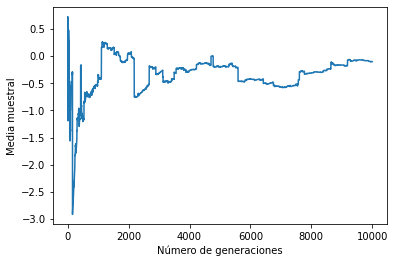

In [35]:
# Generando las simulaciones con la distribución de Cauchy
x = rd.standard_cauchy(10000)

# Calculando la media del total de simulaciones
# Esta es la aproximación de la simulación
print("La media de todas las simulaciones es", np.mean(x))

# Calculando la media en cada simulación
mediaT = np.cumsum(x)/range(1, len(x)+1)

# Graficando la evolución de la proporción
plt.plot(mediaT)

# Etiquetas de la gráfica
plt.xlabel('Número de generaciones')
plt.ylabel('Media muestral')
plt.show()

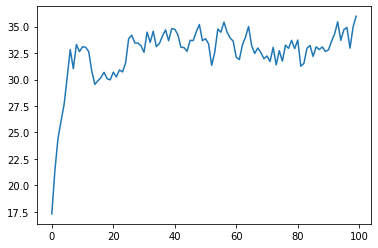

In [6]:
x = 10

X = []
for i in range(100):
    x = 10 + 0.7*x + rd.normal(0,1)
    X.append(x)

plt.plot(X)
plt.show()